<a href="https://colab.research.google.com/github/TOFWAQ/Kaggle_Challenge/blob/main/TEAM_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
!pip install fancyimpute
from fancyimpute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
!pip install --upgrade scikit-learn
from sklearn.metrics import confusion_matrix



In [ ]:
#Read the train data as a panda dataframe
train_link = ('https://raw.githubusercontent.com/TOFWAQ/Train_data/main/train.csv')
train = pd.read_csv(train_link)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
#Read the test data as a panda dataframe
test_link = ('https://raw.githubusercontent.com/TOFWAQ/Train_data/main/test.csv')
test = pd.read_csv(test_link)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<ipython-input-5-28fbdbfc1422>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


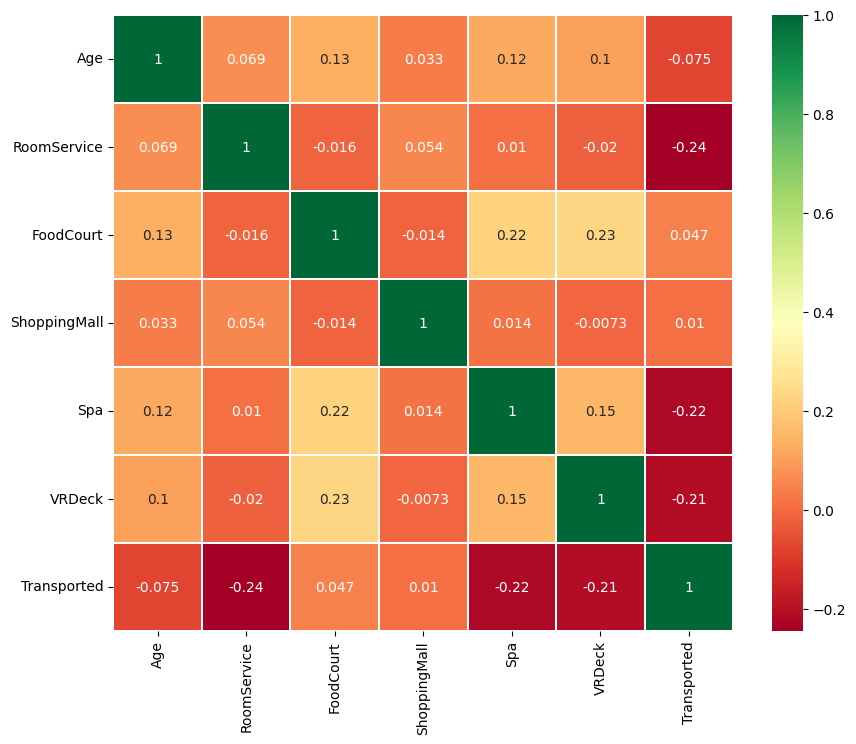

In [ ]:
#Correlation Between The Features
#In train data
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<ipython-input-6-82ab96d6cd96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


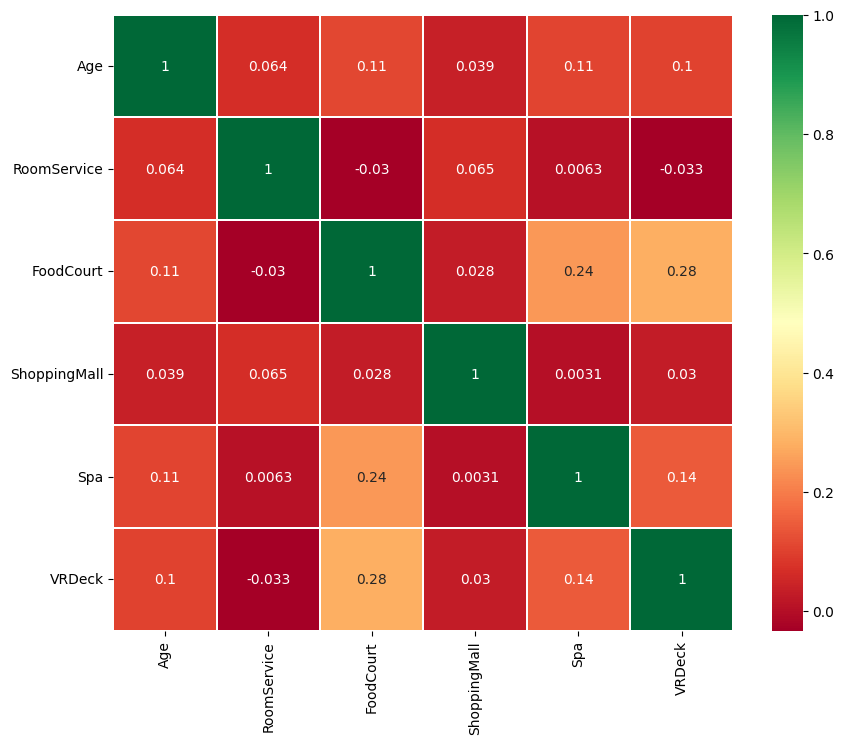

In [ ]:
#Correlation Between The Features in test data
sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
#shape oftrain dataset
train.shape

(8693, 14)

In [ ]:
#info of train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
#Check nulls values for both train and test data
def check_null_values(dfs):
    for df in dfs:
        print(df.isnull().sum())
        print("\n")

# Call the function
#To view both train and test
check_null_values([train, test])

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64




In [ ]:
#statisitical summary
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


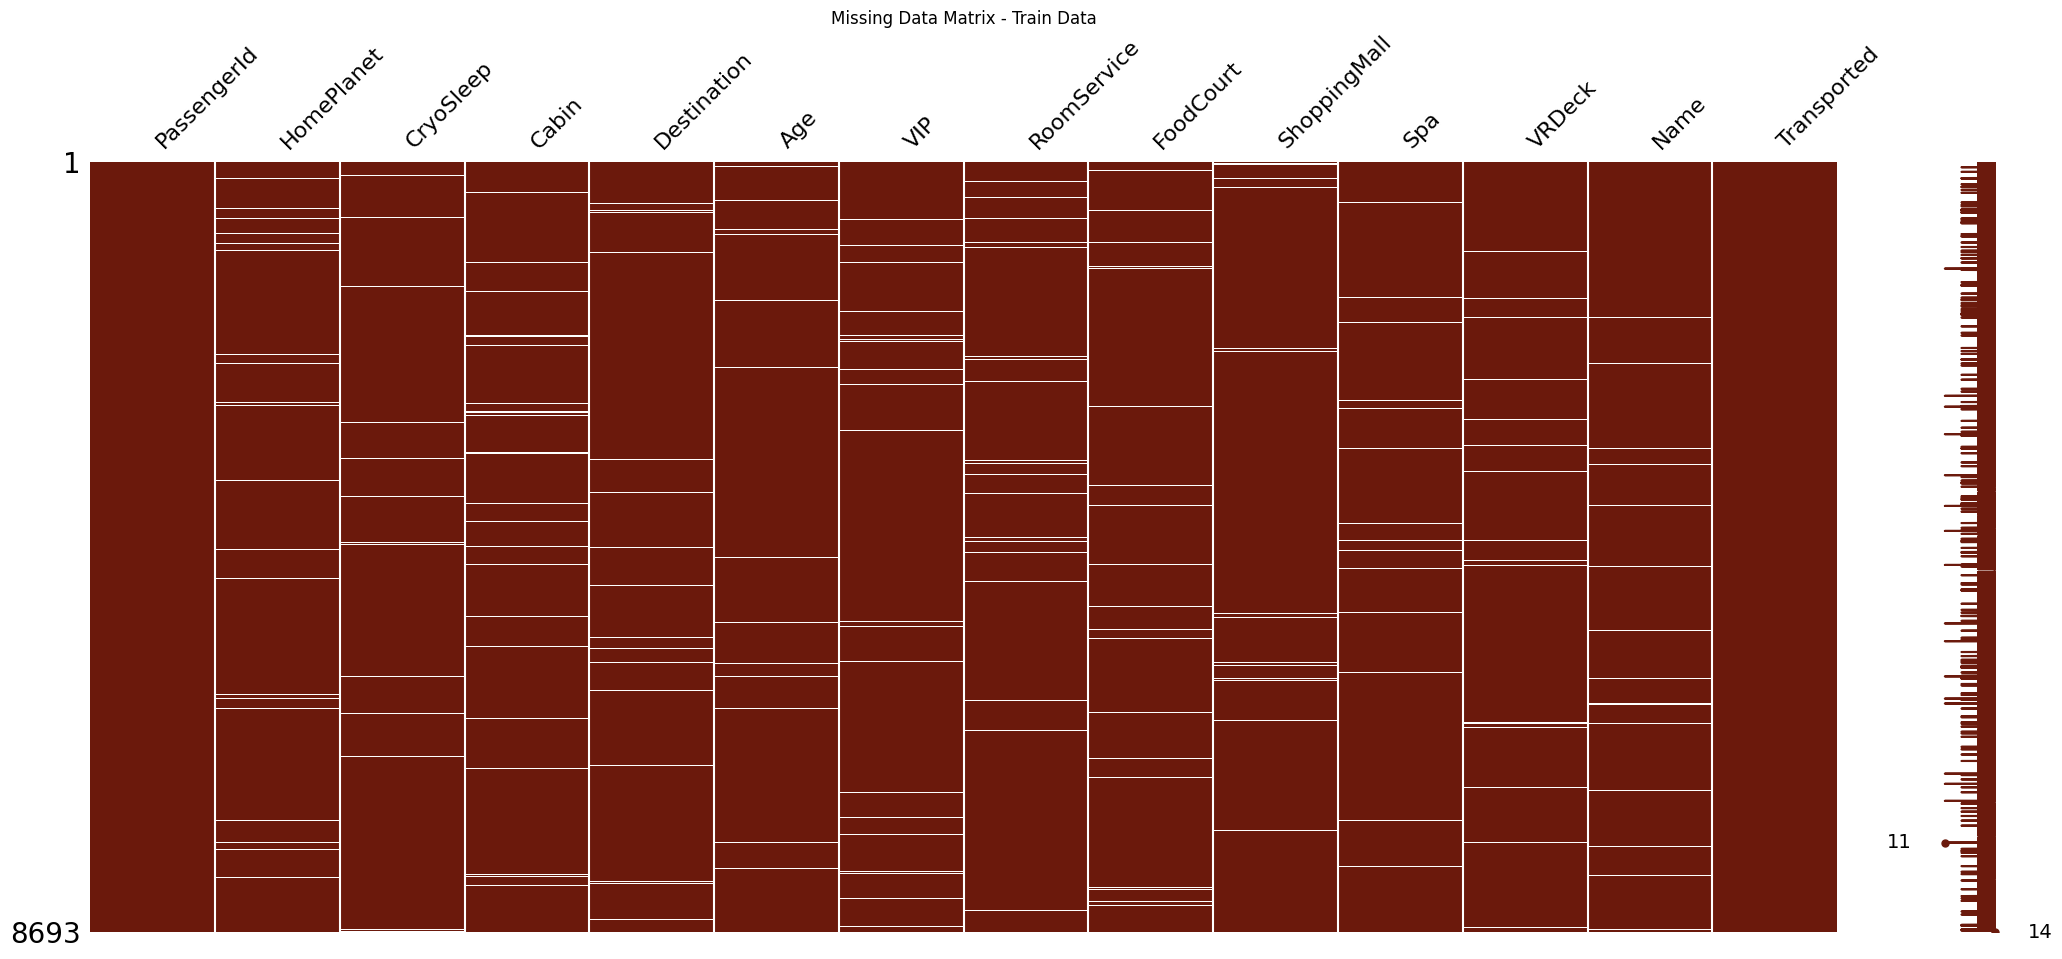

In [ ]:
#Visualise the null values
# Set the color of the missing values to 'red'
msno.matrix(train, color=(0.42, 0.1, 0.05))

plt.title('Missing Data Matrix - Train Data')
plt.show()

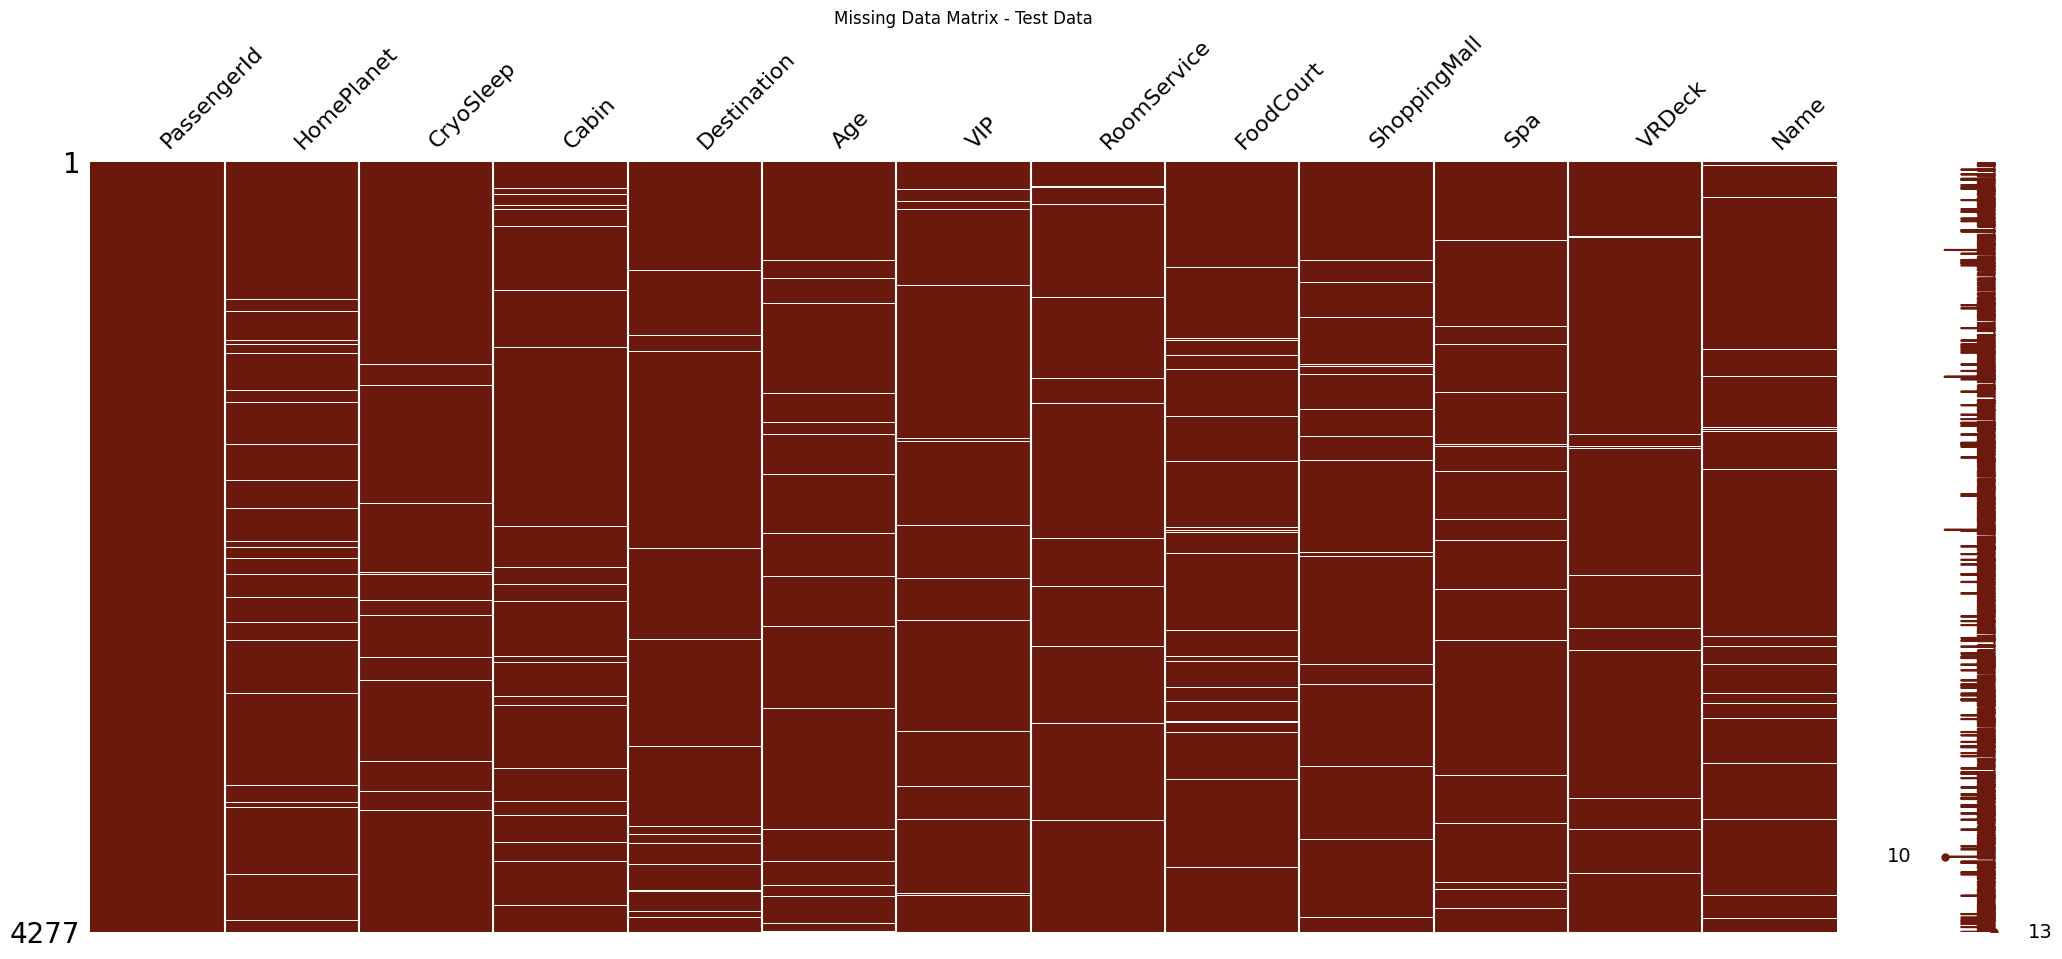

In [ ]:
#Visualise the missing value for test data
msno.matrix(test, color=(0.42, 0.1, 0.05))

plt.title('Missing Data Matrix - Test Data')
plt.show()

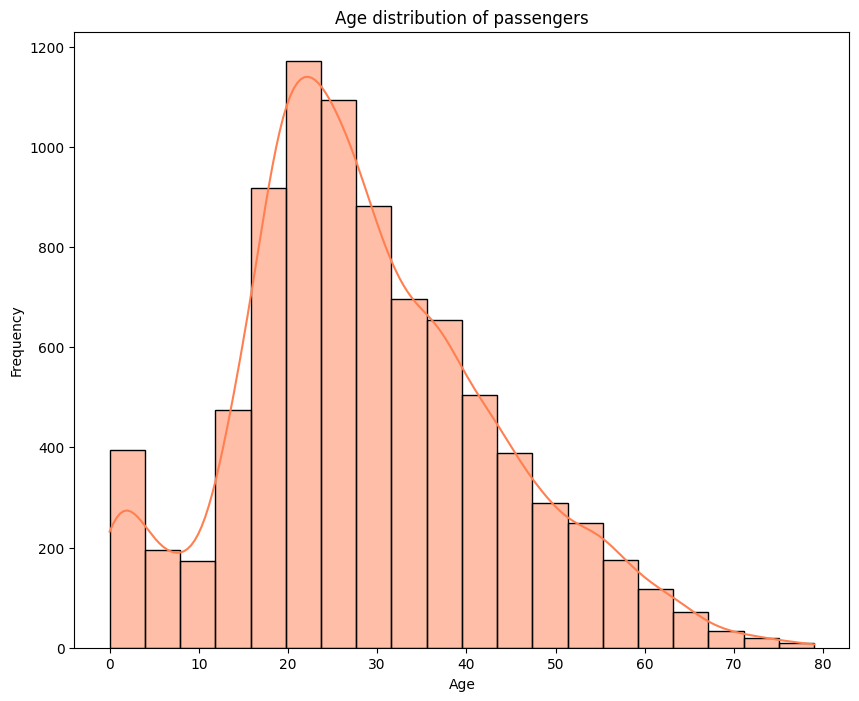

In [ ]:
# Age distribution of passengers
plt.figure(figsize=(10,8))
sns.histplot(train['Age'], bins=20, kde=True, color='coral')
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-47278e7f0471>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='HomePlanet', data=train, order=train['HomePlanet'].value_counts().index, palette='dark')


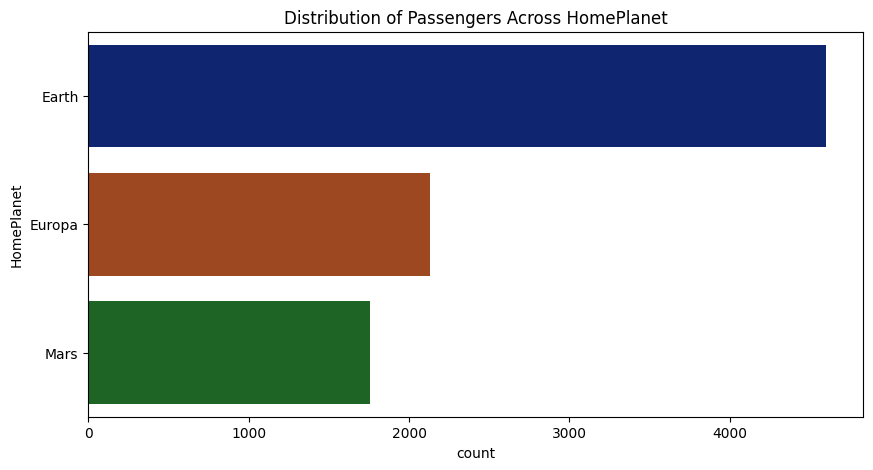

In [ ]:
# Visualization of passengers across Homeplanet
plt.figure(figsize=(10,5))
sns.countplot(y='HomePlanet', data=train, order=train['HomePlanet'].value_counts().index, palette='dark')
plt.title('Distribution of Passengers Across HomePlanet')
plt.ylabel('HomePlanet')
plt.show()

<ipython-input-15-b969ccaff2e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Destination', data=train, order=train['Destination'].value_counts().index, palette='bright')


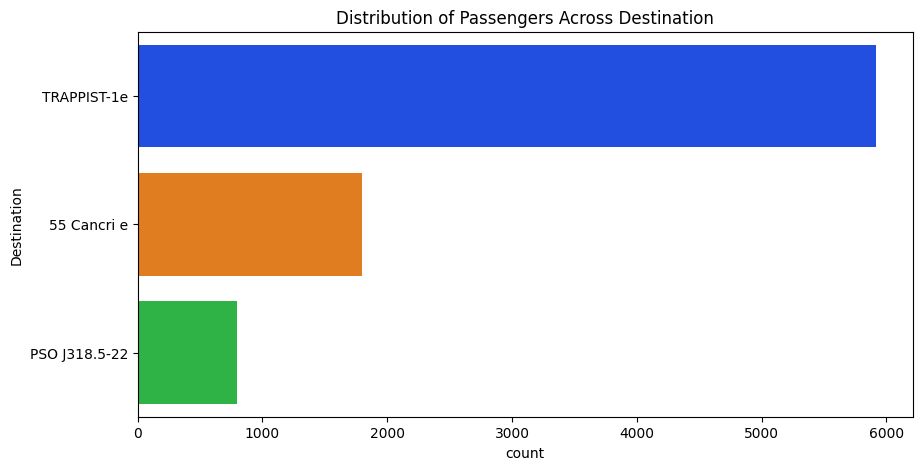

In [ ]:
#Visualization of Passangers across their destination
plt.figure(figsize=(10,5))
sns.countplot(y='Destination', data=train, order=train['Destination'].value_counts().index, palette='bright')
plt.title('Distribution of Passengers Across Destination')
plt.ylabel('Destination')
plt.show()


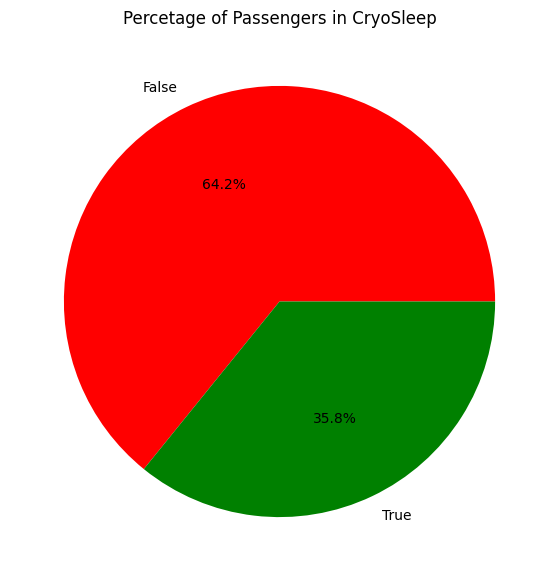

In [ ]:
#Percentage of passengers put in Cryosleep vs those who are not
cryosleep_counts = train['CryoSleep'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(cryosleep_counts, labels=cryosleep_counts.index, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Percetage of Passengers in CryoSleep')
plt.show()

### Bivariate Analysis


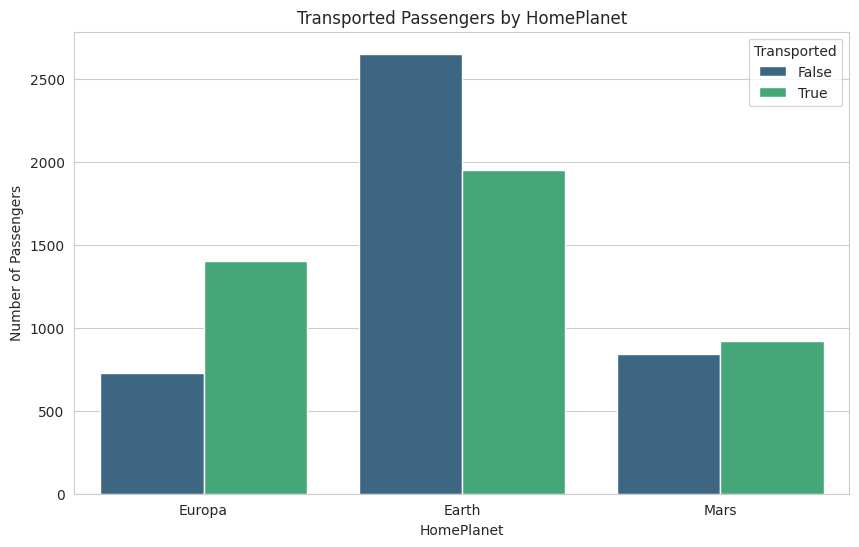

In [ ]:
#Set the style of sns
sns.set_style('whitegrid')


plt.figure(figsize=(10, 6))

# Create a count plot with 'HomePlanet' on the x-axis and the 'Transported' column for hue
sns.countplot(data=train, x='HomePlanet', hue='Transported', palette='viridis')

#plot the bar
plt.title('Transported Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Number of Passengers')


plt.show()

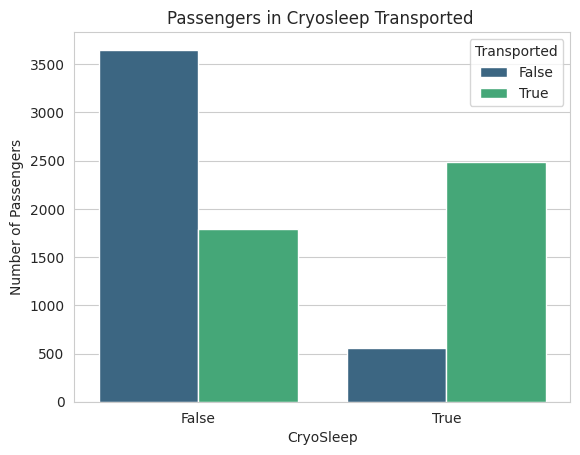

In [ ]:

# Create a count plot with Cryosleep on the x-axis and the 'Transported' column
sns.countplot(data=train, x='CryoSleep', hue='Transported', palette='viridis')

# plot
plt.title('Passengers in Cryosleep Transported ')
plt.xlabel('CryoSleep')
plt.ylabel('Number of Passengers')


plt.show()


#### Multivariate Analysis

<ipython-input-19-9df59c18b50d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  f = (train[['VIP', 'Age', 'Transported']]).corr()


<Axes: >

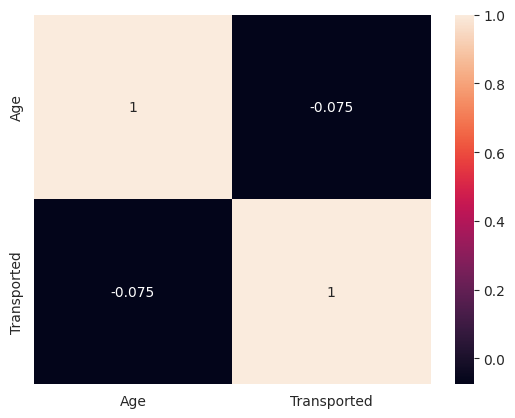

In [ ]:
#Heatmap to show correlation between the columns
f = (train[['VIP', 'Age', 'Transported']]).corr()

sns.heatmap(f, annot=True)

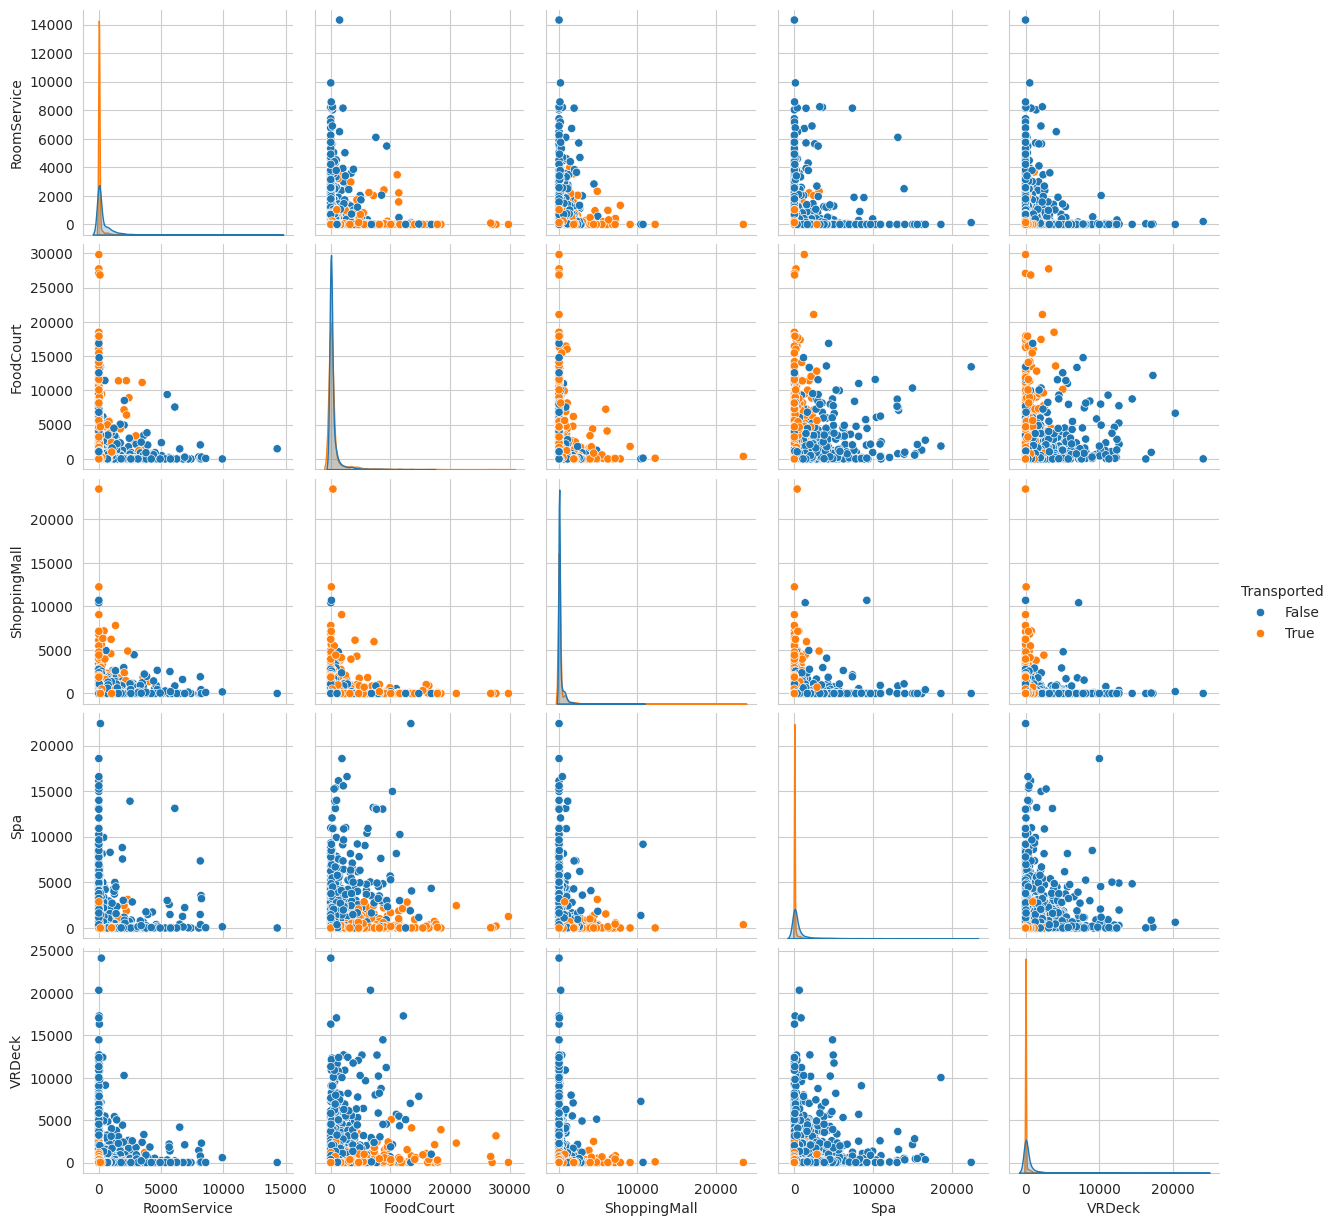

In [ ]:
#Pairwise relationship relationship between variables
selected_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
subset_df = train[selected_columns]

# Plot the pair plot
sns.pairplot(subset_df, hue='Transported', kind='scatter')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


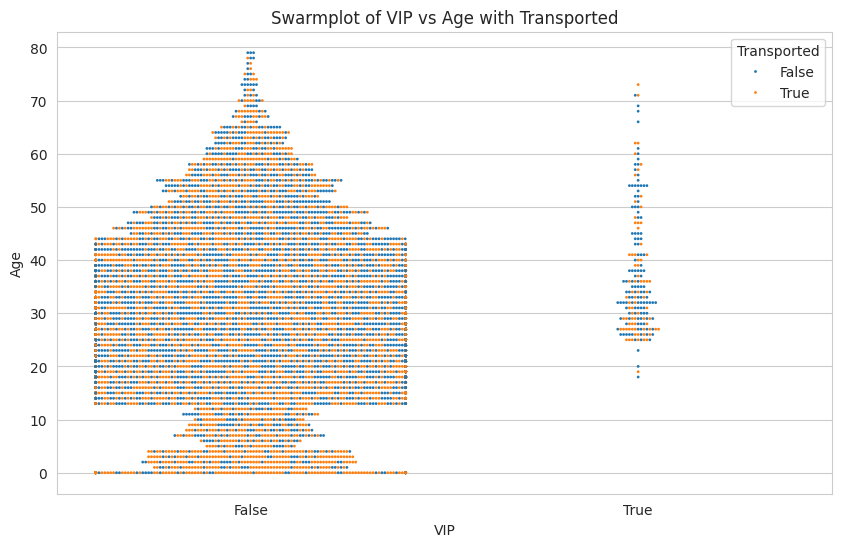

In [ ]:
#Visualizing the distribution of data points within different categories
plt.figure(figsize=(10, 6))
sns.swarmplot(x='VIP', y='Age', data=train, hue='Transported', size=2)
plt.title('Swarmplot of VIP vs Age with Transported')
plt.xlabel('VIP')
plt.ylabel('Age')
plt.show()

# **PREPROCESSING**

In [ ]:
# Initialize the label encoder
le = LabelEncoder()

# Label encode to assign values to similar strings
train['HomePlanet'] = le.fit_transform(train['HomePlanet'])
train['Destination'] = le.fit_transform(train['Destination'])
train['Transported'] = le.fit_transform(train['Transported'])
train['CryoSleep'] = le.fit_transform(train['CryoSleep'])
train['VIP'] = le.fit_transform(train['VIP'])

In [ ]:
test['HomePlanet'] = le.fit_transform(test['HomePlanet'])
test['Destination'] = le.fit_transform(test['Destination'])
test['CryoSleep'] = le.fit_transform(test['CryoSleep'])
test['Cabin'] = le.fit_transform(test['Cabin'])
test['VIP'] = le.fit_transform(test['VIP'])

In [ ]:
# Drop 'Name' and 'PassengerId' and Cabin columns
#Label encoding shouldn't be done on them
train.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [ ]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [ ]:
# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder
#transform the dataset
df_encode = encoder.fit_transform(train)

#use of iterativeImputer
mice_imput = IterativeImputer()

# Perform the imputation
df_imput = mice_imput.fit_transform(df_encode)

# Convert imputed output to a pandas dataframe
train_n = pd.DataFrame(df_imput, columns=train.columns)
train_n_encoded = encoder.inverse_transform(df_imput)
train_n = pd.DataFrame(train_n_encoded, columns=train.columns)

#print the new null filled train data
train_n.head(n=10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
5,0.0,0.0,1.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1.0
6,0.0,0.0,2.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1.0
7,0.0,1.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,8182.0,1.0
8,0.0,0.0,2.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,1.0
9,1.0,1.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder and transform the dataset
dff_encoded = encoder.fit_transform(test)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Perform the imputation
dff_imputed = mice_imputer.fit_transform(dff_encoded)

# Convert imputed output to a pandas dataframe
test_n = pd.DataFrame(dff_imputed, columns=test.columns)

# Convert the imputed dataset back to original categories
test_n_encoded = encoder.inverse_transform(dff_imputed)

test_n = pd.DataFrame(test_n_encoded, columns=test.columns)
test_n.head(n=10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0
5,0.0,0.0,2.0,31.0,0.0,0.0,1615.0,263.0,113.0,60.0
6,1.0,1.0,0.0,21.0,0.0,0.0,46.0,0.0,0.0,0.0
7,1.0,1.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,24.0,0.0,0.0,639.0,0.0,0.0,0.0


In [ ]:
#Check nulls for both train and test data
def check_null_values(dfs):
    for df in dfs:
        print(df.isnull().sum())
        print("\n")

# Use the function
#to view it
check_null_values([train_n,test_n])

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       1
ShoppingMall    0
Spa             1
VRDeck          1
Transported     0
dtype: int64


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64




In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Create an imputer object that replaces
#the remaining NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
x_train_imputed = imputer.fit_transform(train_n)

# Convert imputed output to a pandas dataframe
train_n = pd.DataFrame(x_train_imputed, columns=train_n.columns)

train_n.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [ ]:
#Check nulls for both train and test data
def check_null_values(dfs):
    for df in dfs:
        print(df.isnull().sum())
        print("\n")

# call the function
check_null_values([train_n,test_n])

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64




In [ ]:
train_n.shape, test_n.shape

((8693, 11), (4277, 10))

In [ ]:
# Split the DataFrame into features (X) and target variable (y)
X = train_n.drop('Transported', axis=1)
y = train_n['Transported']

# **Modelling**

---



---



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(6085, 10)
(6085,)


In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
#print the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7841257668711656

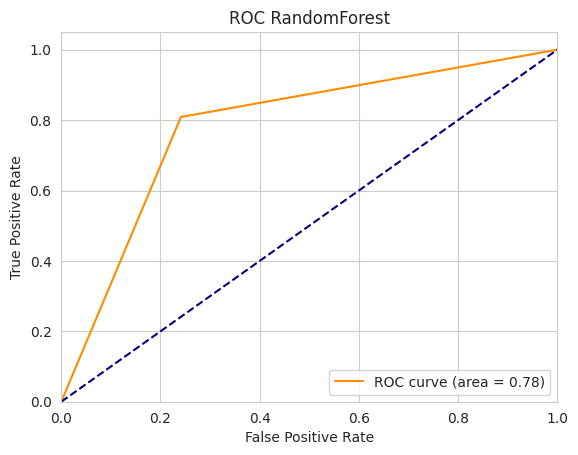

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot the ROC curve
#Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Compute the AUC
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RandomForest')
plt.legend(loc="lower right")
plt.show()

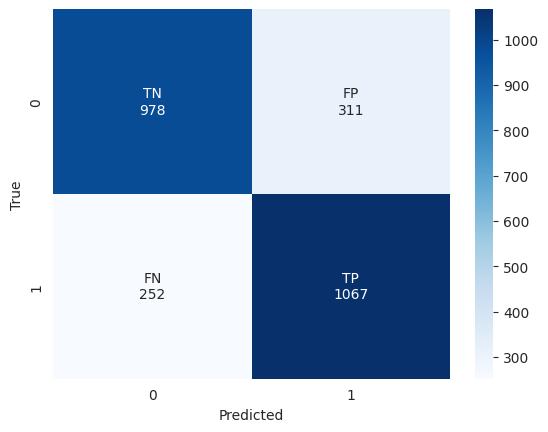

In [ ]:
c_m = confusion_matrix(y_test, y_pred)

#create the label
labels = ['TN', 'FP', 'FN', 'TP']
categories = np.asarray(labels).reshape(2,2)

#combine the label and values
annotations = [f"{label}\n{value}" for label, value in zip(labels, c_m.flatten())]
annotations = np.asarray(annotations).reshape(2,2)

# Visualize the confusion matrix
sns.heatmap(c_m,annot=annotations,fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression

modell = LogisticRegression(max_iter=1000)
modell.fit(x_train, y_train)

y_predi = modell.predict(x_test)
accuracy_score(y_test,y_predi)

0.7396472392638037

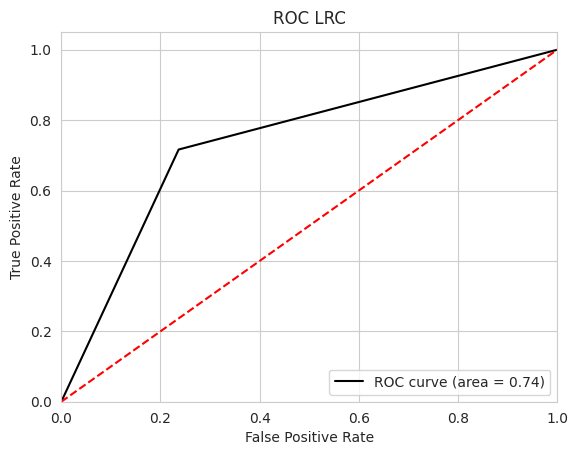

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot the ROC curve
#Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predi)

# Compute the AUC
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='black', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LRC')
plt.legend(loc="lower right")
plt.show()

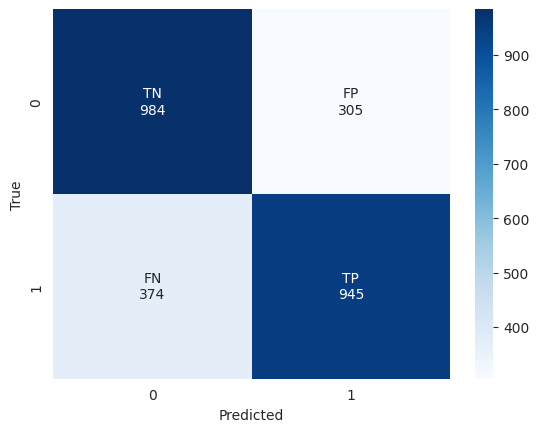

In [ ]:
cm = confusion_matrix(y_test, y_predi)


#create the label
labels = ['TN', 'FP', 'FN', 'TP']
categories = np.asarray(labels).reshape(2,2)

#combine the label and values
# Create a new array for annotations, combining labels and values
annotations = [f"{label}\n{value}" for label, value in zip(labels, cm.flatten())]
annotations = np.asarray(annotations).reshape(2,2)
# Visualize the confusion matrix
sns.heatmap(cm,annot=annotations,fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')



plt.show()



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelll = GradientBoostingClassifier()
modelll.fit(x_train, y_train)

y_predic = modelll.predict(x_test)
accuracy_score(y_test, y_predic)

0.7891104294478528

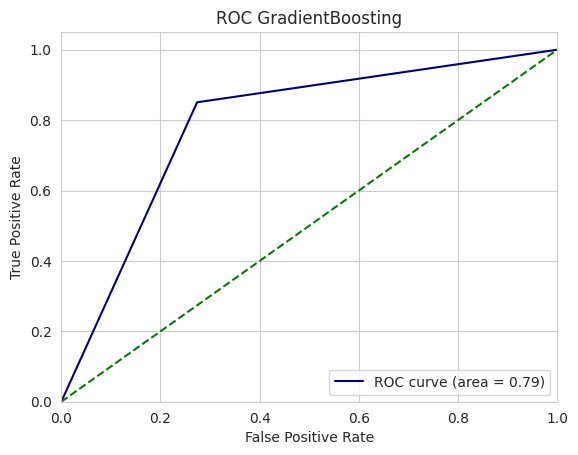

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot the ROC curve
#Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predic)

# Compute the AUC
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='navy', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC GradientBoosting')
plt.legend(loc="lower right")
plt.show()

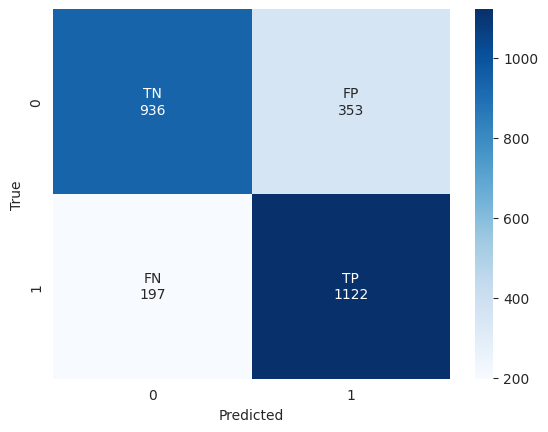

In [ ]:
con_m = confusion_matrix(y_test, y_predic)


#create the label
labels = ['TN', 'FP', 'FN', 'TP']
categories = np.asarray(labels).reshape(2,2)

#combine the label and values
annotations = [f"{label}\n{value}" for label, value in zip(labels, con_m.flatten())]
annotations = np.asarray(annotations).reshape(2,2)

# Visualize the confusion matrix
sns.heatmap(con_m,annot=annotations,fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()




In [ ]:
#import the sample submission
sub = pd.read_csv('https://raw.githubusercontent.com/TOFWAQ/Train_data/main/sample_submission.csv')
print(sub)

     PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]


In [ ]:
#using the gradient boosting classifier
#to predict for the test
PredL=modelll.predict(test_n)

In [ ]:
# Create a new DataFrame with ID and Predicted Rentals
grad_p = pd.DataFrame({
    'PassengerId': sub['PassengerId'],
    'Transported': PredL
})

In [ ]:
from google.colab import files
# Convert 0s and 1s to "False" and "True"
grad_p.replace({0: False, 1: True}, inplace=True)


In [ ]:
grad_p.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
# Write the dataFrame to a .csv file
grad_p.to_csv('submission_Test_2.csv', index=False)

#Download the .csv file
files.download("submission_Test_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
PredLR=modell.predict(test_n)
# Create a new DataFrame with ID and Predicted Rentals
lr_p = pd.DataFrame({
    'PassengerId': sub['PassengerId'],
    'Transported': PredLR
})

lr_p.replace({0: False, 1: True}, inplace=True)

# Write the dataFrame to a .csv file
lr_p.to_csv('submission_Test_3.csv', index=False)

#Download the .csv file
files.download("submission_Test_3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis & *XAI* *italicized text*

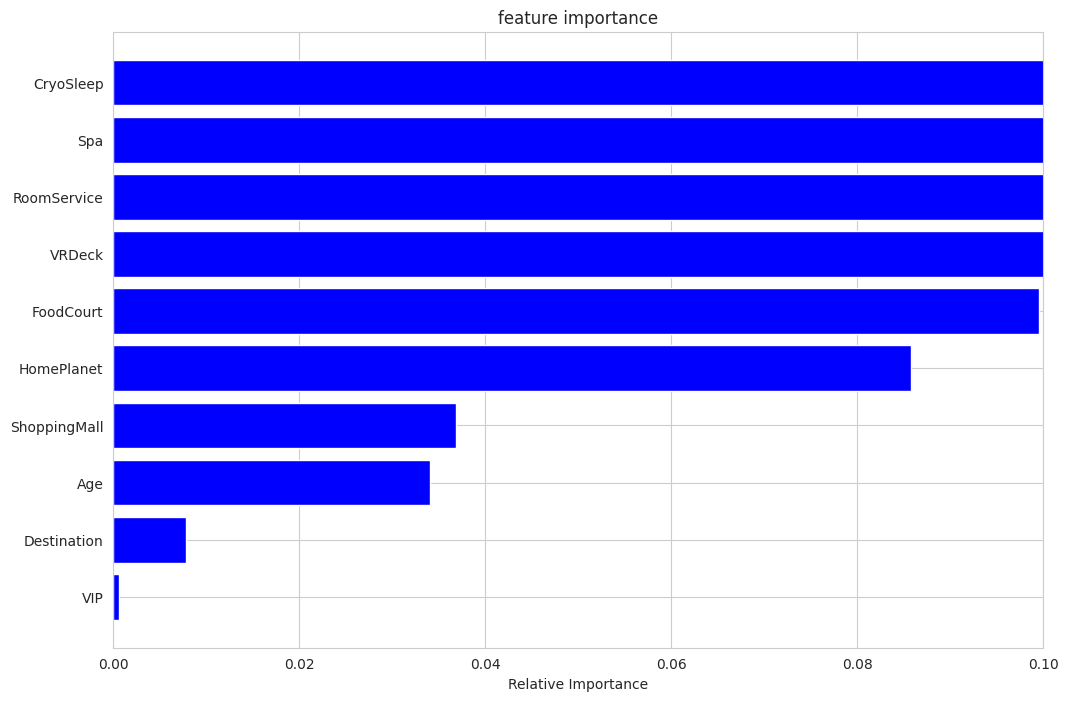

In [ ]:
# feature importance
feature_im = modelll.feature_importances_
features = X.columns

#indices by their importance
index = np.argsort(feature_im)

plt.figure(figsize=(12, 8))
plt.title('feature importance')
plt.barh(range(len(index)), feature_im[index], color='b', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

#Adjust x-axis limit
plt.xlim(0, 0.1)

plt.show()

In [ ]:
!pip install shap

<ipython-input-61-9cb3b347e94d>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=c_map))


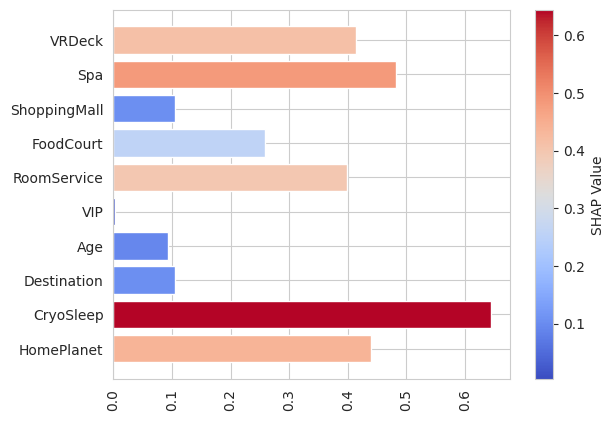

In [ ]:
import shap


# The fitted GBC and X feature set
explainer = shap.TreeExplainer(modelll)
shap_values = explainer.shap_values(X)

# Calculate the MA SHAP value for each feature
mean_shap_value = np.mean(np.abs(shap_values), axis=0)

# Color map  based on their y-value
c_map = plt.get_cmap("coolwarm")

# Normalize the SHAP values to the range [0, 1] for color mapping
norm = plt.Normalize(vmin=mean_shap_value.min(), vmax=mean_shap_value.max())
color = c_map(norm(mean_shap_value))


#Plot the SHAP
plt.barh(X.columns, mean_shap_value, color=color)
plt.xticks(rotation=90)

# Add a color bar to the plot
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=c_map))
cbar.set_label('SHAP Value')

plt.show()